# Practical Session 2: Discounted Infinite-horizon Markov Decision Problems and Iterative Methods

##### *M2 Artificial Intelligence (Paris Saclay University) - Reinforcement Learning*

---

First, this notebook introduces infinite-horizon Markov decision processes with the expected total discounted reward criterion.
These models are the best understood of all infinite-horizon Markov decision problems.

The infinite-horizon discounted reward criterion lead to so-called "fixed point equations" for the value function, which are at the heart of the most standard Reinforcement Learning algorithms.

<br>
<br>
<br>
<br>
<br>

## Part I: Policy Evaluation in Discounted MDPs 

### Definition (Expected Total Discounted Reward):

Let $\pi = (d_0, d_1, \ldots)$ be a policy.

The **expected total discounted reward** with discount factor $\gamma \in [0, 1)$ when starting from state $s$ and following policy $\pi$ is defined as:
$$
v^\pi_\gamma(s) = \mathbb{E}^\pi \left[ \sum_{t=0}^{\infty} \gamma^t r(X_t, Y_t) \mid X_0 = s \right] = \lim_{N \to \infty} \mathbb{E}^\pi \left[ \sum_{t=0}^{N} \gamma^t r(X_t, Y_t) \mid X_0 = s \right]
$$

Because of the following theorem, *only Markovian policies need to be considered in discounted MDPs.*

**Theorem (Reduction to Markovian Policies):**
For any policy $\pi = (d_0, d_1, \ldots)$ (which may be history-dependent), there exists a Markovian policy $\pi' = (d'_0, d'_1, \ldots)$ such that:
$$
v^\pi_\gamma(s) = v^{\pi'}_\gamma(s), \quad \forall s \in \mathcal{S}
$$
Hence, the optimal value function over all policies can be expressed as:
$$
v^*_\gamma(s) = \sup_{\pi \in \Pi} v^\pi_\gamma(s) = \sup_{\pi \in \Pi_{M}} v^\pi_\gamma(s), \quad \forall s \in \mathcal{S}
$$
where $\Pi_{M}$ is the set of Markovian policies.


<div class="alert alert-warning">

#### Question: Existence of the limit
Give a condition on the reward function $r$ that ensures the existence of the limit in the above definition.

</div>

<div class="alert alert-info">

#### Answer:

A sufficient condition for the existence of the limit is that the reward function $r$ is bounded. Specifically, if there exists a constant $M$ such that for all states $s$ and actions $a$, $|r(s, a)| \leq M$, then the series converges. This is because the geometric series $\sum_{t=0}^{\infty} \gamma^t$ converges for $\gamma \in [0, 1)$, in which case $|v^\pi_\gamma(s)| \leq \frac{M}{1 - \gamma}$.

</div>


### Definition (Policy Evaluation Equation):

Let $\pi = (d_0, d_1, \ldots)$ be a Markovian policy. 
One has

$$
v^\pi_\gamma(s) = \sum_{a \in A} d_0(a|s) r(s, a) + \gamma \sum_{a \in A} d_0(a|s) \sum_{s' \in S} P(s'|s, a) \left[ d_1(a'|s') r(s', a') + \gamma \sum_{a' \in A} d_1(a'|s') \sum_{s'' \in S} P(s''|s', a') \ldots \right]
$$
i.e.
$$
v^\pi_\gamma(s) = \sum_{a \in A} d_0(a|s) \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v^{\pi'}_\gamma(s') \right]
$$

where $\pi' = (d_1, d_2, \ldots)$ is the policy obtained by removing the first decision rule of $\pi$.
The above equation shows that the discounted reward corresponsings to policy $\pi$ equals the discounted reward in a one-period problem in which the decision maker uses decision rule $d_0$ and receives an immediate reward $r(s, a)$ plus the expected discounted reward of policy $\pi'$ starting from the next state.

When the policy $\pi$ is stationary, i.e., $\pi = (d, d, \ldots)$, recall that we denote it by $\pi = d$.
In this case, the above equation simplifies to:
$$
v^\pi_\gamma(s) = \sum_{a \in A} \pi(a|s) \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v^\pi_\gamma(s') \right]
$$
Here, the policy $\pi$ is the same in the left-hand side and the right-hand side of the equation.

Consequently, when the policy $\pi$ is stationary, the value function $v^\pi_\gamma$ satisfies the following system of linear equations (one equation for each state $s \in S$):
$$
v(s) = \sum_{a \in A} \pi(a|s) \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v(s') \right]
\coloneqq T^\pi_\gamma v(s),
\quad \forall s \in S
$$
It is a functional equation (term used by Bellman) where the unknown is the function $v: S \to \mathbb{R}$.
In functional form, it can be written as:
$$
v = T^\pi_\gamma v
$$
where $T^\pi_\gamma$ is called the **policy evaluation operator** associated with policy $\pi$ and discount factor $\gamma$.
A element $v$ satisfying this equation is called a **fixed point** of the operator $T^\pi_\gamma$.


The following theorem ensures that this system has a unique solution.

**Theorem (Policy Evaluation)**
For any stationary policy $\pi = d$ and any discount factor $\gamma \in [0, 1)$, the system of equations
$$
v(s) = \sum_{a \in A} \pi(a|s) \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v(s') \right], \quad \forall s \in S
$$
has a unique solution $v^\pi_\gamma$, which is the expected total discounted reward corresponding to policy $\pi$.

<div class="alert alert-warning">

#### Question: Policy Evaluation for deterministic Markovian policies

Write the system of linear equations satisfied by the value function $v^\pi_\gamma$ for any deterministic Markovian policy $\pi$ in a general MDP.

</div>

<div class="alert alert-info">

#### Answer:

For a stationary deterministic Markovian policy $\pi$ defined by a decision rule $d: S \to A$, the value function $v^\pi_\gamma$ satisfies the following system of linear equations:

$$
v(s) = r(s, \pi(s)) + \gamma \sum_{s' \in S} P(s'|s, \pi(s)) v(s'), \quad \forall s \in S
$$

</div>

<div class="alert alert-warning">

#### Question: Policy Evaluation of the Two-State MDP
Evaluate the stationary Markov deterministic policy $\pi$ defined by $\pi(s_1) = a_{1, 1}$ and $\pi(s_2) = a_{2, 1}$ in the two-state MDP introduced in Practical Session 1, for a fixed discount factor $\gamma \in [0, 1)$.  
Evaluate the stationary Markov deterministic policy $\beta$ defined by $\beta(s_1) = a_{1, 2}$ and $\beta(s_2) = a_{2, 1}$.

</div>

<div class="alert alert-info">

#### Answer:

The pollicy evaluation equations for the given policy $\pi$ are:
$$
v(s_1) = r(s_1, a_{1, 1}) + \gamma \sum_{s' \in S} P(s'|s_1, a_{1, 1}) v(s')
$$
$$
v(s_2) = r(s_2, a_{2, 1}) + \gamma \sum_{s' \in S} P(s'|s_2, a_{2, 1}) v(s')
$$
Substituting the given rewards and transition probabilities, we have:
$$
v(s_1) = 5 + 0.5 \gamma v(s_1) + 0.5 \gamma v(s_2)
$$
$$
v(s_2) = -1 + \gamma v(s_2)
$$

So that:
$$
v_\gamma^\pi(s_1) = \frac{5 - 5.5 \gamma}{(1 - 0.5 \gamma)(1 - \gamma)}, \quad v_\gamma^\pi(s_2) = \frac{-1}{1 - \gamma}
$$


For the policy $\beta$, the policy evaluation equations the solution is:

$$
v_\gamma^\beta(s_1) = \frac{10 - 11 \gamma}{1 - \gamma}, \quad v_\gamma^\beta(s_2) = \frac{-1}{1 - \gamma}
$$

</div>

<br>
<br>
<br>
<br>
<br>

## Part II: Optimality Equations

### Definition (Optimality Equations):

Suppose that the action spaces $A(s)$ are finite for all states $s \in S$ (otherwise, max operators would need to be replaced by sup operators and theorems would need additional assumptions).
Recall that in finite-horizon MDPs, the optimal value functions satisfy the **optimality equations** (finite-horizon Bellman equations):
$$
v_n(s) = \max_{a \in A} \left[ r(s, a) + \sum_{s' \in S} P(s'|s, a) v_{n+1}(s') \right], \quad \forall s \in S
$$

Passing to the limit suggests that in infinite-horizon discounted MDPs, the optimal value function $v^*_\gamma$ satisfies the following system of equations (one equation for each state $s \in S$):
$$
v(s) = \max_{a \in A} \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v(s') \right]
\coloneqq T^*_\gamma v(s), \quad \forall s \in S
$$
It is a functional equation where the unknown is the function $v: S \to \mathbb{R}$.
In functional form, it can be written as:
$$
v = T^*_\gamma v
$$
where $T^*_\gamma$ is called the **optimality operator** associated with discount factor $\gamma$ (note the presence of the maximum operator in this case).


**Theorem (Existence and Uniqueness of the Solution to the Optimality Equations)**
For any discount factor $\gamma \in [0, 1)$, the system of equations
$$
v(s) = \max_{a \in A} \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v(s') \right], \quad \forall s \in S
$$
has a unique solution $v^*_\gamma$, which is the optimal value function in the infinite-horizon discounted MDP.



**Theorem (Existence of Optimal Stationary Deterministic Policies)**
For any discount factor $\gamma \in [0, 1)$, there exists a stationary deterministic Markov policy $\pi^* = d^*$ that is optimal, i.e.,
$$
v^{\pi^*}_\gamma(s) = v^*_\gamma(s), \quad \forall s \in S
$$
Moreover, any stationary deterministic Markov policy $\pi^* = d^*$ satisfying
$$
d^*(s) \in \arg\max_{a \in A} \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v^*_\gamma(s') \right], \quad \forall s \in S
$$
is optimal.


<div class="alert alert-warning">

#### Question: Optimal Policy for the Two-State MDP

Find the optimal value function $v^*_\gamma$ and an optimal stationary deterministic policy $\pi^* = d^*$ for the two-state MDP introduced in Practical Session 1, for a fixed discount factor $\gamma \in \{0.9\}$.

</div>

<div class="alert alert-info">

#### Answer:

First, the action space is finite in the two-state MDP. Thus, the two theorems above apply.

The optimality equations for the two-state MDP are:
$$
v(s_1) = \max \left\{ 5 + 0.5 \gamma v(s_1) + 0.5 \gamma v(s_2), \ 10 + \gamma v(s_2) \right\}
$$
$$
v(s_2) = \max \left\{ -1 + \gamma v(s_2) \right\} = -1 + \gamma v(s_2)
$$  
Solving these equations, we find:
$$
v^*_\gamma(s_2) = \frac{-1}{1 - \gamma}
$$
To find $v^*_\gamma(s_1)$, we compare the two options in the max operator:

$$
v^*_\gamma(s_1) = \max \left\{ 5 - 0.5 \frac{\gamma}{1 - \gamma} + 0.5 \gamma v^*_\gamma(s_1), \ 10
- \frac{\gamma}{1 - \gamma} \right\}
$$
Solving this, for $\gamma \in \{0.9\}$, we get:
- For $\gamma = 0.9$:
  $$v^*_{0.9}(s_1) = 1, \quad v^*_{0.9}(s_2) = -10$$

In $s = s_1$, the optimal action is $a_{1, 2}$ since it yields a higher value:
$$
\arg\max_{a \in A} \left[ 5 - 0.5 \frac{0.9}{1 - 0.9} + 0.5 \cdot 0.9 \cdot 1, \ 10 - \frac{0.9}{1 - 0.9} \right]
= \argmax \{0.95, 1\} = a_{1, 2}
$$
In $s = s_2$, the only action is $a_{2, 1}$
Consequently, an optimal stationary deterministic Markovian policy $\pi^* = d^*$ is given by:


$$
d^*(s_1) = a_{1, 2}, \quad d^*(s_2) = a_{2, 1}
$$

</div>

<br>
<br>
<br>
<br>
<br>

## Part III: Value and Policy Iteration Algorithms

### Definition (Value Iteration Algorithm):

The **Value Iteration Algorithm** is a fundamental iterative method to compute the optimal value function $v^*_\gamma$ in infinite-horizon discounted MDPs. Basically, it consists in applying iteratively the optimality operator $T^*_\gamma$ (this scheme is called fixed-point iteration) starting from an initial value function (often chosen as the zero function).

It is defined as follows:
- Initialize $v_0(s) = 0$ for all $s \in S$, choose $\epsilon > 0$ and set $n = 0$.
- Repeat until convergence (i.e., until $\|v_{n+1} - v_n\|_\infty < \epsilon$):
    $$
    v_{n+1}(s) = \max_{a \in A} \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v_n(s') \right], \quad \forall s \in S
    $$
    - Increment $n$ by 1.


**Informal Theorem (Convergence of the Value Iteration Algorithm)**
The Value Iteration Algorithm can approximate the optimal value function $v^*_\gamma$ with arbitrary precision that depends on the choice of $\epsilon$. The convergence does not depend on the topology of the state and action spaces.
The policy obtained by acting greedily with respect to the approximate value function can be optimal.

<div class="alert alert-warning">

#### Question: Value Iteration for the Inventory Control Problem

Implement the Value Iteration Algorithm to compute the optimal value function $v^*_\gamma$ and an optimal stationary deterministic policy $\pi^* = d^*$ for an infinite-horizon stochastic inventory control problem (or a problem of your choice) introduced in Practical Session 1, with $\gamma \in [0, 1)$.

</div>

```
Optimal Value Function v*(s):
[17.53 21.72 25.44 27.53]

Optimal Policy pi*(s) (Order Amount):
[3 0 0 0]

--- Interpretation ---
State s=0: Order 3 units (Target Inventory: 3)
State s=1: Order 0 units (Target Inventory: 1)
State s=2: Order 0 units (Target Inventory: 2)
State s=3: Order 0 units (Target Inventory: 3)
```

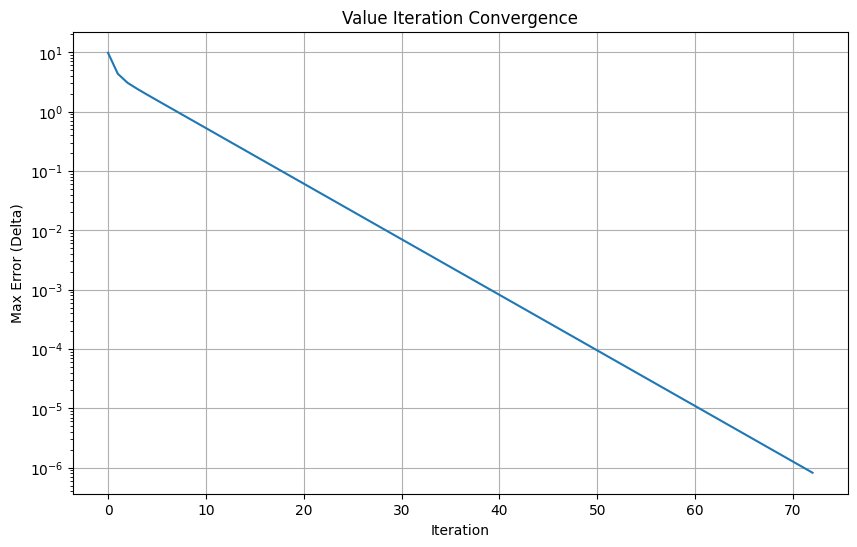

In [3]:
# Plotting the error
plt.figure(figsize=(10, 6))
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Max Error (Delta)')
plt.title('Value Iteration Convergence')
plt.yscale('log')
plt.grid(True)
plt.show()

### Definition (Policy Iteration Algorithm):

The **Policy Iteration Algorithm** is an iterative method to compute the optimal value function $v^*_\gamma$ and an optimal policy $\pi^* = d^*$ in infinite-horizon discounted MDPs.

It is defined as follows:
- Initialize a stationary deterministic Markovian policy $\pi_0 = d_0$, set $n = 0$.
- Repeat until convergence (i.e., until $\pi_{n+1} = \pi_n$):
    - **Policy Evaluation Step**: Compute the value function $v^{\pi_n}_\gamma$ corresponding to policy $\pi_n$ by solving the system of linear equations:
    $$
    v(s) = \sum_{a \in A} \pi_n(a|s) \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v(s') \right], \quad \forall s \in S
    $$
    - **Policy Improvement Step**: Update the policy by setting, for all states $s \in S$,
    $$
    \pi_{n+1}(s) \in \arg\max_{a \in A} \left[ r(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) v^{\pi_n}_\gamma(s') \right]
    $$
    - Increment $n$ by 1.

Note that the following theorem holds on the convergence of the Policy Iteration Algorithm.

**Theorem (Convergence of the Policy Iteration Algorithm)**
The Policy Iteration Algorithm converges in a finite number of iterations to an optimal stationary deterministic Markovian policy $\pi^* = d^*$ and its corresponding optimal value function $v^*_\gamma$ when the action spaces $A(s)$ are finite for all states $s \in S$ and the state space $S$ is finite.

<div class="alert alert-warning">

#### Question: Policy Iteration for the Inventory Control Problem

Implement the Policy Iteration Algorithm to compute the optimal value function $v^*_\gamma$ and an optimal stationary deterministic policy $\pi^* = d^*$ for the infinite-horizon stochastic inventory control problem (or a problem of your choice) based on the problem introduced in Practical Session 1, where $\gamma \in [0, 1)$.

</div>

```
Optimal Value Function v*(s) (Policy Iteration):
[17.53 21.72 25.44 27.53]

Optimal Policy pi*(s):
[3 0 0 0]
```

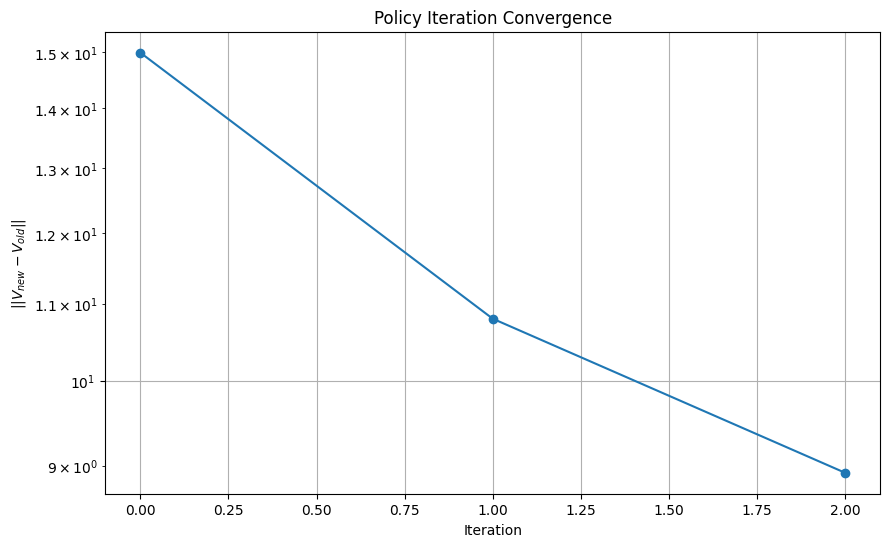

In [5]:
# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(deltas_pi, marker='o')
plt.xlabel('Iteration')
plt.ylabel(r'$||V_{new} - V_{old}||$')
plt.title('Policy Iteration Convergence')
plt.yscale('log')
plt.grid(True)
plt.show()

<br>
<br>
<br>
<br>
<br>